 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [44]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [45]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# YOUR CODE HERE

whale_dataframe = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_dataframe.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [46]:
# Count nulls
# YOUR CODE HERE

whale_dataframe.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [47]:
# Drop nulls
# YOUR CODE HERE

whale_dataframe.dropna(inplace=True)

whale_dataframe.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [48]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE

algo_dataframe = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_dataframe.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [49]:
# Count nulls
# YOUR CODE HERE

algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [50]:
# Drop nulls
# YOUR CODE HERE

algo_dataframe.dropna(inplace=True)

algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [95]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE

sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_dataframe = pd.read_csv(sp500_history_csv,index_col="Date", infer_datetime_format=True,  parse_dates=True)
sp500_dataframe.head()

sp500_dataframe.sort_values(by='Date', inplace = True)


sp500_dataframe.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [96]:
# Check Data Types
# YOUR CODE HERE
sp500_dataframe.dtypes


Close    object
dtype: object

In [97]:
# Fix Data Types
# YOUR CODE HERE

sp500_dataframe["Close"] = sp500_dataframe["Close"].str.replace('$','')
sp500_dataframe["Close"] = sp500_dataframe["Close"].astype('float64')
sp500_dataframe.info()

sp500_dataframe.head()





<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [111]:
# Calculate Daily Returns
# YOUR CODE HERE

sp500_return = sp500_dataframe.pct_change()

sp500_return






,S&P500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [112]:
# Drop nulls
# YOUR CODE HERE

sp500_return.dropna(inplace=True)

sp500_return.isnull().sum()

S&P500    0
dtype: int64

In [114]:
# Rename Column
# YOUR CODE HERE

sp500_return.columns = ['S&P500']

sp500_return




,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [218]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

combined_df = pd.concat([whale_dataframe, algo_dataframe, sp500_return,], axis="columns", join="inner")

combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

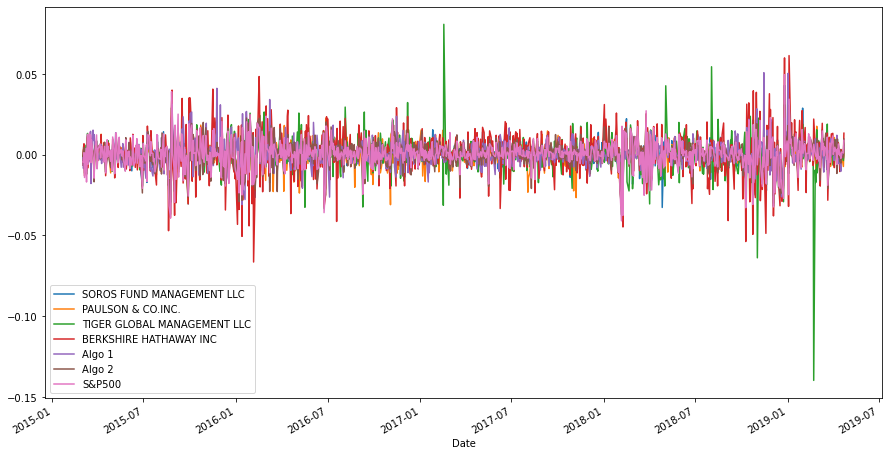

In [219]:
# Plot daily returns
# YOUR CODE HERE

combined_df.plot(figsize=(15,8))

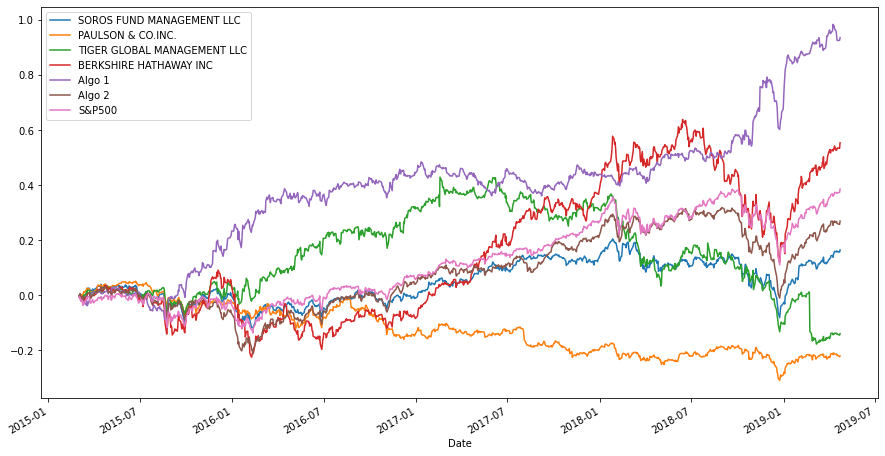

In [137]:
# Plot cumulative returns
# YOUR CODE HERE

cumulative_returns = (1+combined_df).cumprod() -1
cumulative_returns.plot(figsize=(15,8))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

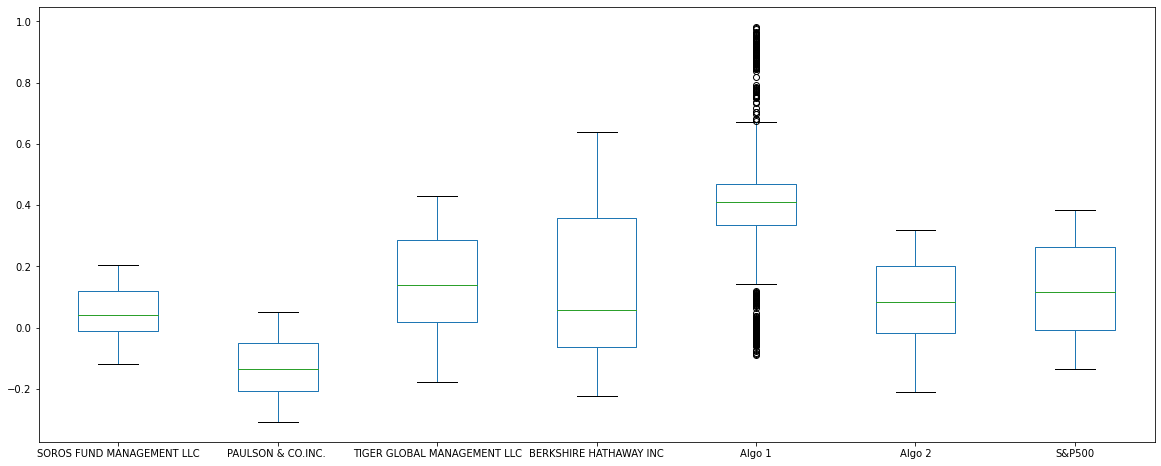

In [138]:
# Box plot to visually show risk
# YOUR CODE HERE

cumulative_returns.plot.box(figsize=(20,8))

In [142]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

daily_std = combined_df.std()
print(daily_std)


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64


In [144]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
high_risk = daily_std[daily_std > daily_std["S&P500"]]
print(high_risk)

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [154]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

annualized_dev = daily_std * np.sqrt(252)
annualized_dev



SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

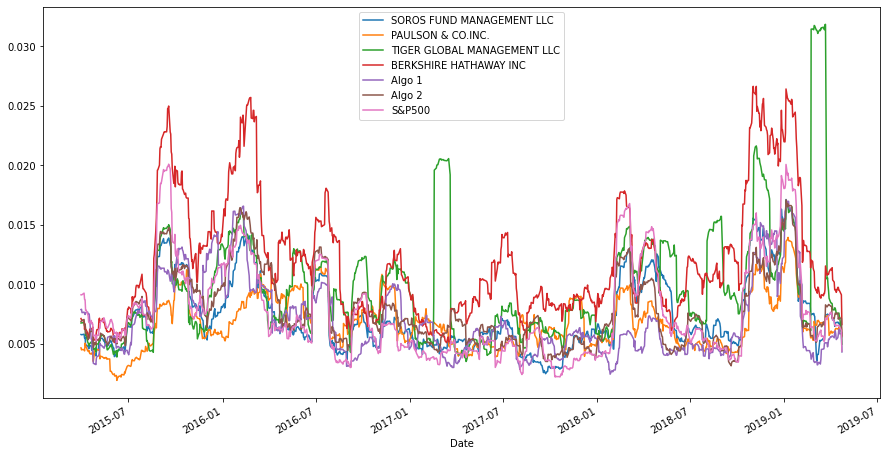

In [172]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

combined_df.rolling(window=21).std().plot(figsize=(15,8))

In [173]:
# Construct a correlation table
# YOUR CODE HERE

correlation_df = combined_df.corr()

correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [174]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['S&P500'])
variance = combined_df['S&P500'].var()
algo1_beta = covariance / variance
algo1_beta

0.7946528805681052

In [182]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE


combined_df.ewm



<bound method NDFrame._add_series_or_dataframe_operations.<locals>.ewm of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                   

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [176]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P500                         0.648267
Algo 1                         1.378648
dtype: float64

algo portfolios outperform market


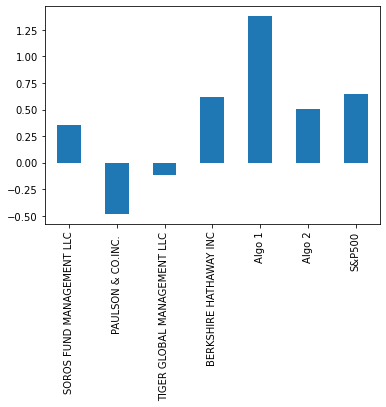

In [186]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratios.plot.bar()

print("algo portfolios outperform market")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [192]:
# Read the first stock
# YOUR CODE HERE
# APPLE

aapl_returns_csv = Path("Resources/AAPLE-STOCK2 - Sheet1.csv")

aapl_df = pd.read_csv(aapl_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

aapl_df.head()



,Close
Date,
2019-01-02 16:00:00,39.48
2019-01-03 16:00:00,35.55
2019-01-04 16:00:00,37.07
2019-01-07 16:00:00,36.98
2019-01-08 16:00:00,37.69


In [198]:
# Read the second stock
# YOUR CODE HERE
#FERRARI

ferrari_returns_csv = Path("Resources/FERRARI-STOCK2 - Sheet1.csv")

ferrari_df = pd.read_csv(ferrari_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

ferrari_df.head()

,Close
Date,
2019-01-02 16:00:00,98.70
2019-01-03 16:00:00,96.98
2019-01-04 16:00:00,102.23
2019-01-07 16:00:00,104.48
2019-01-08 16:00:00,108.58


In [195]:
# Read the third stock
# YOUR CODE HERE

spotify_returns_csv = Path("Resources/SPOTIFY-STOCK - Sheet1.csv")

spotify_df = pd.read_csv(spotify_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

spotify_df.head()

,Close
Date,
2019-01-02 16:00:00,113.74
2019-01-03 16:00:00,109.02
2019-01-04 16:00:00,118.51
2019-01-07 16:00:00,119.36
2019-01-08 16:00:00,117.48


In [202]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

my_portfolio = pd.concat([aapl_df, ferrari_df, spotify_df,], axis="columns", join="inner")

my_portfolio

,Close,Close,Close
Date,,,
2019-01-02 16:00:00,39.48,98.70,113.74
2019-01-03 16:00:00,35.55,96.98,109.02
2019-01-04 16:00:00,37.07,102.23,118.51
2019-01-07 16:00:00,36.98,104.48,119.36
2019-01-08 16:00:00,37.69,108.58,117.48
...,...,...,...
2020-10-08 16:00:00,114.97,181.32,249.80
2020-10-09 16:00:00,116.97,182.84,250.00
2020-10-12 16:00:00,124.40,184.90,251.44


In [ ]:
# Reset the index
# YOUR CODE HERE

Index Already Reset

In [222]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

my_portfolio.columns.values[0] = "AAPL"
my_portfolio.columns.values[1] = "RACE"
my_portfolio.columns.values[2] = "SPOT"


my_portfolio

,AAPL,RACE,SPOT
Date,,,
2019-01-02 16:00:00,39.48,98.70,113.74
2019-01-03 16:00:00,35.55,96.98,109.02
2019-01-04 16:00:00,37.07,102.23,118.51
2019-01-07 16:00:00,36.98,104.48,119.36
2019-01-08 16:00:00,37.69,108.58,117.48
...,...,...,...
2020-10-08 16:00:00,114.97,181.32,249.80
2020-10-09 16:00:00,116.97,182.84,250.00
2020-10-12 16:00:00,124.40,184.90,251.44


In [223]:
# Drop Nulls
# YOUR CODE HERE

my_portfolio.dropna(inplace=True)
my_portfolio.isnull().sum()

AAPL    0
RACE    0
SPOT    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [224]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_portfolio_returns = my_portfolio.pct_change()


portfolio_returns = my_portfolio_returns.dot(weights)
portfolio_returns.head()

Date
2019-01-02 16:00:00         NaN
2019-01-03 16:00:00   -0.052823
2019-01-04 16:00:00    0.061313
2019-01-07 16:00:00    0.008918
2019-01-08 16:00:00    0.014230
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [233]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

mynew_portfolio = pd.concat([my_portfolio_returns,combined_df], axis="columns", join="inner")

mynew_portfolio.head(10)

# I am not sure why my concatted data is blank

,AAPL,RACE,SPOT,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,,,


In [234]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
mynew_portfolio.dropna(inplace=True)
mynew_portfolio.isnull().sum()


AAPL                           0
RACE                           0
SPOT                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
dtype: int64

In [235]:
mynew_portfolio

,AAPL,RACE,SPOT,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,,,


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

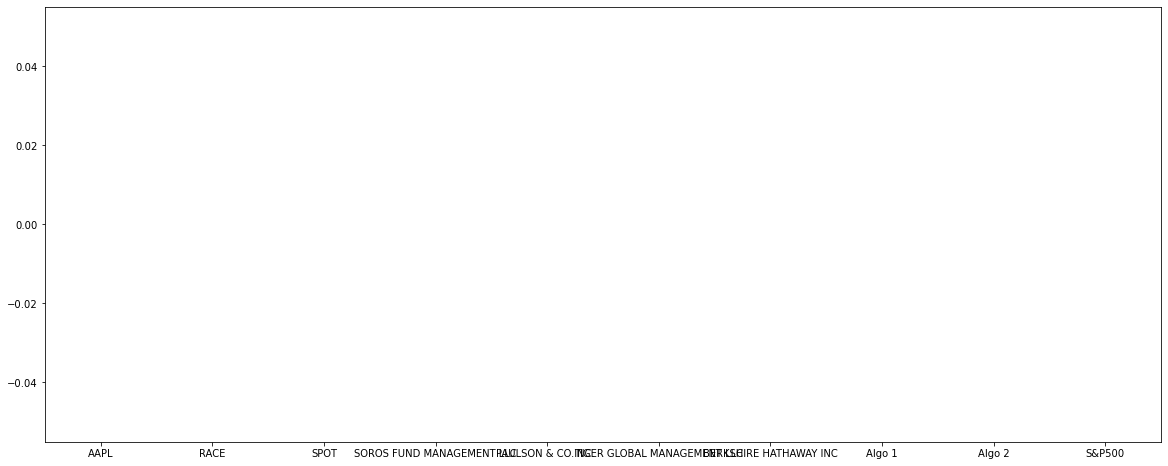

In [236]:
# Risk
# YOUR CODE HERE

mynew_portfolio.plot.box(figsize=(20,8))

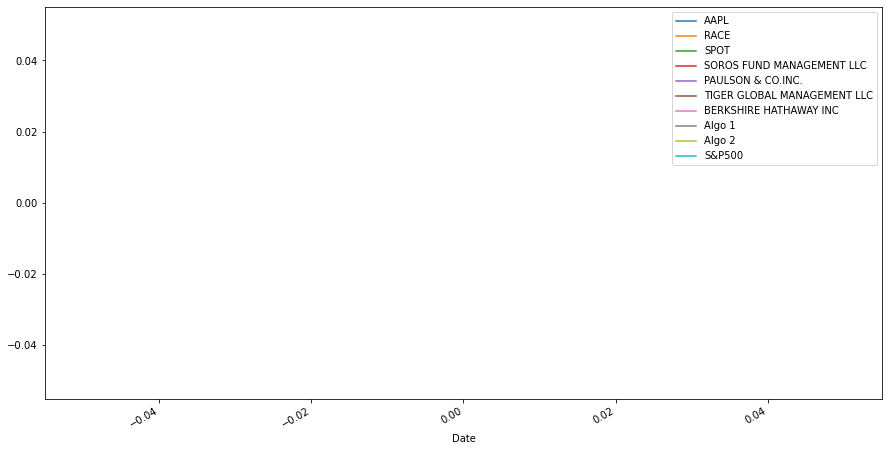

In [237]:
# Rolling
# YOUR CODE HERE

mynew_portfolio.rolling(window=21).std().plot(figsize=(15,8))

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE